## Importing Libraries

In [214]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style= 'white', color_codes= True)


##Loading DataSet


In [215]:
data = pd.read_csv("//content/drive/MyDrive/Datasets/SeoulBikeData.csv")
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


##Encoding DataSet

In [216]:
data.drop(['Holiday'],axis = 1, inplace = True)

In [217]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
df = data.apply(LE.fit_transform)

# LE.fit(data)
# data = LE.transform(data)



df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day
0,11,253,0,111,28,22,1788,114,0,0,0,3,1
1,11,203,1,108,29,8,1788,114,0,0,0,3,1
2,11,172,2,103,30,10,1788,113,0,0,0,3,1
3,11,106,3,101,31,9,1788,114,0,0,0,3,1
4,11,77,4,103,27,23,1788,104,0,0,0,3,1


In [218]:
df.dtypes

Date                        int64
Rented Bike Count           int64
Hour                        int64
Temperature(C)              int64
Humidity(%)                 int64
Wind speed (m/s)            int64
Visibility (10m)            int64
Dew point temperature(C)    int64
Solar Radiation (MJ/m2)     int64
Rainfall(mm)                int64
Snowfall (cm)               int64
Seasons                     int64
Functioning Day             int64
dtype: object

In [219]:
#df = data.select_dtypes(include= ['float64','int64'])

In [220]:
df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day
0,11,253,0,111,28,22,1788,114,0,0,0,3,1
1,11,203,1,108,29,8,1788,114,0,0,0,3,1
2,11,172,2,103,30,10,1788,113,0,0,0,3,1
3,11,106,3,101,31,9,1788,114,0,0,0,3,1
4,11,77,4,103,27,23,1788,104,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,356,991,19,205,25,26,1682,187,0,0,0,0,1
8756,356,755,20,197,28,23,1788,191,0,0,0,0,1
8757,356,686,21,189,30,3,1756,191,0,0,0,0,1
8758,356,704,22,184,32,10,1648,192,0,0,0,0,1


##Checking Missing Value

In [221]:
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Functioning Day             0
dtype: int64

##Checking Columns

In [222]:
df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Functioning Day'],
      dtype='object')

##Removing Outliers

In [223]:
df.rename(columns = {'Wind speed (m/s)':'Wind_speed_(m/s)'},inplace = True)

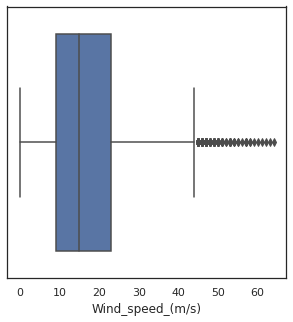

In [224]:
plt.figure(figsize = (5,5))
sns.boxplot(df['Wind_speed_(m/s)'])
plt.show()

In [225]:
Q1 , Q2 , Q3 = np.percentile(df['Wind_speed_(m/s)'],[25 , 50, 75])

In [226]:
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)

print(low_lim, up_lim)

-12.0 44.0


In [227]:
df = df[df['Wind_speed_(m/s)']<up_lim]
df = df[df['Wind_speed_(m/s)']>low_lim]



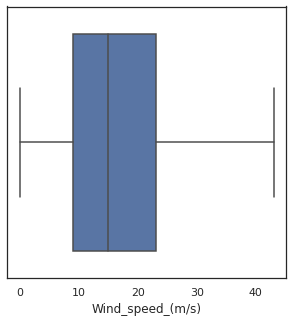

In [228]:
plt.figure(figsize = (5,5))
sns.boxplot(df['Wind_speed_(m/s)'])
plt.show()

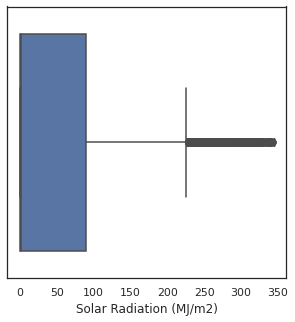

In [229]:
plt.figure(figsize = (5,5))
sns.boxplot(df['Solar Radiation (MJ/m2)'])
plt.show()

In [230]:
Q1 , Q2, Q3 = np.percentile(df['Solar Radiation (MJ/m2)'],[25,50,75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
print(low_lim , up_lim)

-135.0 225.0


In [231]:
df = df[df['Solar Radiation (MJ/m2)']<up_lim]
df = df[df['Solar Radiation (MJ/m2)']>low_lim]

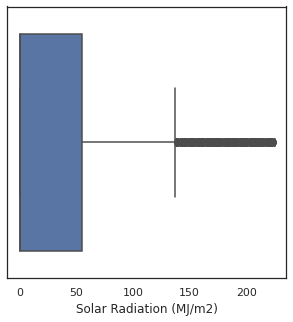

In [232]:
plt.figure(figsize = (5,5))
sns.boxplot(df['Solar Radiation (MJ/m2)'])
plt.show()

##Constructing Correlation

In [233]:
df_corr = df.corr()
df_corr

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind_speed_(m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day
Date,1.000000,0.024568,0.001283,0.014677,-0.027077,-0.014896,-0.090162,0.000826,-0.007775,-0.011480,0.112261,-0.015322,0.067273
Rented Bike Count,0.024568,1.000000,0.420250,0.551920,-0.179436,0.129241,0.198321,0.393406,0.258286,-0.179184,-0.149740,-0.260190,0.208690
Hour,0.001283,0.420250,1.000000,0.116423,-0.234536,0.287022,0.093979,0.001532,0.147530,0.001385,-0.017913,0.000628,0.003140
Temperature(C),0.014677,0.551920,0.116423,1.000000,0.244459,-0.065680,0.014000,0.925883,0.251438,0.078502,-0.225793,-0.351839,-0.061722
Humidity(%),-0.027077,-0.179436,-0.234536,0.244459,1.000000,-0.303285,-0.546939,0.582780,-0.391210,0.328192,0.099101,-0.144286,-0.017001
Wind_speed_(m/s),-0.014896,0.129241,0.287022,-0.065680,-0.303285,1.000000,0.165412,-0.178384,0.289969,-0.030444,0.003300,0.122844,0.016808
Visibility (10m),-0.090162,0.198321,0.093979,0.014000,-0.546939,0.165412,1.000000,-0.185675,0.114848,-0.227664,-0.122386,-0.009814,-0.031342
Dew point temperature(C),0.000826,0.393406,0.001532,0.925883,0.582780,-0.178384,-0.185675,1.000000,0.045647,0.174865,-0.158100,-0.343785,-0.058915
Solar Radiation (MJ/m2),-0.007775,0.258286,0.147530,0.251438,-0.391210,0.289969,0.114848,0.045647,1.000000,-0.090718,-0.052664,-0.063242,-0.019203
Rainfall(mm),-0.011480,-0.179184,0.001385,0.078502,0.328192,-0.030444,-0.227664,0.174865,-0.090718,1.000000,0.009285,-0.034119,0.007409


##Ploting HeatMap using seaborn library

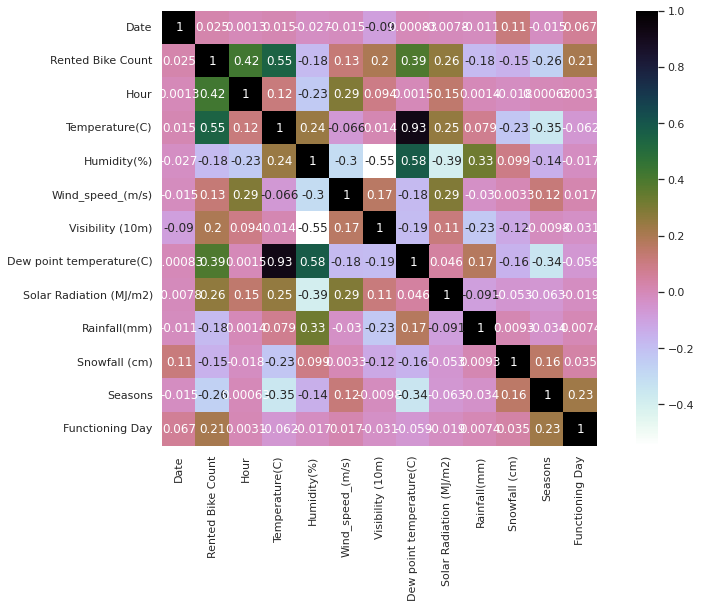

In [234]:
plt.figure(figsize= (14,8))
sns.heatmap(df_corr,annot = True, cmap = 'cubehelix_r',square = True)
plt.show()

In [235]:
data_corr = df_corr['Rented Bike Count'][:-1]
data_corr[abs(data_corr)>=0.30].sort_values(ascending = True)

Dew point temperature(C)    0.393406
Hour                        0.420250
Temperature(C)              0.551920
Rented Bike Count           1.000000
Name: Rented Bike Count, dtype: float64

In [236]:

data_corr

Date                        0.024568
Rented Bike Count           1.000000
Hour                        0.420250
Temperature(C)              0.551920
Humidity(%)                -0.179436
Wind_speed_(m/s)            0.129241
Visibility (10m)            0.198321
Dew point temperature(C)    0.393406
Solar Radiation (MJ/m2)     0.258286
Rainfall(mm)               -0.179184
Snowfall (cm)              -0.149740
Seasons                    -0.260190
Name: Rented Bike Count, dtype: float64

##Creating Variable With Columns

In [237]:
df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Functioning Day'],
      dtype='object')

In [238]:
#df.loc[df.Date == '24/11/2018']

In [239]:
x = df.drop(['Rented Bike Count'],axis=1)
y = df['Rented Bike Count']


##Spliting DataSet For Training and Testing 

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.20)



##Importing Linear Regression

In [241]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

##Testing Data

In [242]:
mode_pred=model.predict(X_test)

##Checking Accuracy Score

In [243]:
model_score=model.score(X_test,Y_test)
print("Our Accuracy Score: ",model_score)

Our Accuracy Score:  0.6129623401328994


##Checking R2 score


In [244]:
from sklearn.metrics import r2_score

print('R_Squared Score of linear regression:',r2_score(Y_test,mode_pred))


R_Squared Score of linear regression: 0.6129623401328994


##Using Ridge & Lasso Trying to Increase Accuaracy Score

In [245]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [246]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X_train, Y_train)
ridge_score = ridge.score(X_test, Y_test)

print("Accuracy Using ridge: ",ridge_score)

Accuracy Using ridge:  0.6129525920380203


In [247]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, Y_train)
lasso_score = lasso.score(X_test, Y_test)

print("Accuracy Using lasso: ",lasso_score)

Accuracy Using lasso:  0.6127670843365053
